# Read Data


In [1]:
from pathlib import Path
from PIL import Image
import numpy as np

In [2]:
data_path = Path("/home/user/data")
train_data_path = data_path / "ML" / "train"
test_data_path = data_path / "test"

In [3]:
img_height = 180
img_width  = 180
image_size = (img_height, img_width)

In [4]:
# lower number of pixels
image_size

(180, 180)

# Images and labels for training data

In [5]:
train_list = []
label_list = []
for directory in list(train_data_path.iterdir()):
    files = list(directory.glob('*.jpg'))
    
    print('Directory: ' + directory.as_posix() + ' (' + str(len(files)) + ' files)')
    
    # Get labels from directory name (0 = normal, 1 = tumor)
    label  = int(directory.as_posix()[-1])
    labels = np.repeat(label, len(files))
    label_list.append(labels)
   
    # 1-dim flattened array per image (feature length = 24300)
    arr = np.array([(np.array(Image.open(file).resize(image_size)) / 255).flatten() for file in files])
    train_list.append(arr)

Directory: /home/user/data/ML/train/target_1 (1382 files)
Directory: /home/user/data/ML/train/target_0 (3618 files)


In [6]:
# merge the two train image matrices into one
X = np.concatenate((train_list[0], train_list[1]))
X.shape

(5000, 97200)

In [7]:
# merge the output labels vectors into one 
Y = np.concatenate((label_list[0], label_list[1]))
Y.shape

(5000,)

# Images and labels for test data

In [8]:
test_list = []
test_label_list = []
test_files_list = []
for directory in list(test_data_path.iterdir()):
    files = list(directory.glob('*.jpg'))
    
    print('Directory: ' + directory.as_posix() + ' (' + str(len(files)) + ' files)')
    
    # Get labels from directory name (0 = normal, 1 = tumor)
    label  = int(directory.as_posix()[-1])
    labels = np.repeat(label, len(files))
    test_label_list.append(labels)
   
    # 1-dim flattened array per image (feature length = 24300)
    arr = np.array([(np.array(Image.open(file).resize(image_size)) / 255).flatten() for file in files])
    test_list.append(arr)
    
    # keep file names in a list
    test_files_list.append([file.as_posix() for file in files])

Directory: /home/user/data/test/target_1 (2751 files)
Directory: /home/user/data/test/target_0 (3249 files)


In [9]:
file_paths = test_files_list[0] + test_files_list[1]

In [12]:
# merge the two test image matrices into one
X_test = np.concatenate((test_list[0], test_list[1]))
X_test.shape

(6000, 97200)

In [13]:
# merge the output labels vectors into one 
Y_test = np.concatenate((test_label_list[0], test_label_list[1]))
Y_test.shape

(6000,)

# Using UMAP to transform and visualize the data

In [11]:
import umap
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# unsupervised
trans = umap.UMAP(n_neighbors = 15, random_state = 42, verbose = True,
                  n_components = 2, metric = 'euclidean', n_jobs = -1).fit(X)

UMAP(random_state=42, verbose=True)
Thu Nov 11 20:41:28 2021 Construct fuzzy simplicial set
Thu Nov 11 20:41:29 2021 Finding Nearest Neighbors
Thu Nov 11 20:41:30 2021 Building RP forest with 9 trees
Thu Nov 11 20:41:48 2021 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Thu Nov 11 20:43:50 2021 Finished Nearest Neighbor Search
Thu Nov 11 20:43:53 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Nov 11 20:44:09 2021 Finished embedding


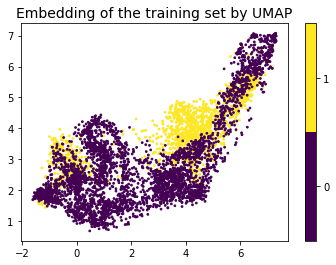

In [18]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 3, c = Y)
plt.title('Embedding of the training set by UMAP', fontsize = 14)
plt.colorbar(boundaries = np.arange(3) - 0.5).set_ticks(np.arange(2)) # 1 = tumor, 0 = normal
plt.savefig('umap_unsupervised.pdf')

In [19]:
# supervised
trans_sup = umap.UMAP(n_neighbors = 15, random_state = 42, verbose = True, # target_weight = 0.5
                      n_components = 2, metric = 'euclidean', n_jobs = -1).fit(X, y = Y)

UMAP(random_state=42, verbose=True)
Thu Nov 11 20:46:33 2021 Construct fuzzy simplicial set
Thu Nov 11 20:46:34 2021 Finding Nearest Neighbors
Thu Nov 11 20:46:35 2021 Building RP forest with 9 trees
Thu Nov 11 20:46:53 2021 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Thu Nov 11 20:48:45 2021 Finished Nearest Neighbor Search
Thu Nov 11 20:48:46 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Nov 11 20:49:04 2021 Finished embedding


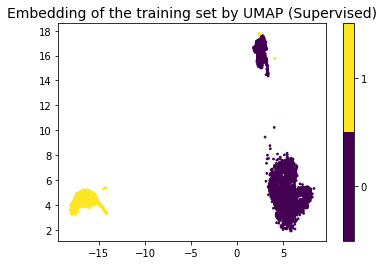

In [20]:
plt.scatter(trans_sup.embedding_[:, 0], trans_sup.embedding_[:, 1], s = 3, c = Y)
plt.title('Embedding of the training set by UMAP (Supervised)', fontsize = 14)
plt.colorbar(boundaries = np.arange(3) - 0.5).set_ticks(np.arange(2))
plt.savefig('umap_supervised.pdf')

# Applying the UMAP model to test data

### With unsupervised transformer

In [21]:
test_embedding = trans.transform(X_test)

Thu Nov 11 20:50:34 2021 Worst tree score: 0.14700000
Thu Nov 11 20:50:34 2021 Mean tree score: 0.15475556
Thu Nov 11 20:50:34 2021 Best tree score: 0.16520000
Thu Nov 11 20:50:40 2021 Forward diversification reduced edges from 75000 to 10256
Thu Nov 11 20:50:44 2021 Reverse diversification reduced edges from 10256 to 10256
Thu Nov 11 20:50:47 2021 Degree pruning reduced edges from 10258 to 5917
Thu Nov 11 20:50:47 2021 Resorting data and graph based on tree order
Thu Nov 11 20:50:48 2021 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

In [22]:
test_embedding.shape

(6000, 2)

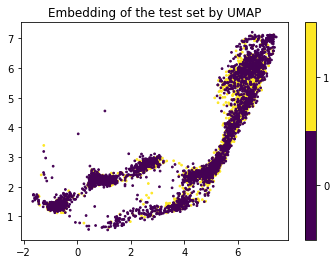

In [23]:
plt.scatter(test_embedding[:, 0], test_embedding[:, 1], s = 3, c = Y_test)
plt.title('Embedding of the test set by UMAP', fontsize = 12)
plt.colorbar(boundaries = np.arange(3) - 0.5).set_ticks(np.arange(2)) # 1 = tumor, 0 = normal

### Not so good classification as in the training data!

### With supervised transformer

In [24]:
test_embedding_sup = trans_sup.transform(X_test)

Thu Nov 11 20:52:30 2021 Worst tree score: 0.14700000
Thu Nov 11 20:52:30 2021 Mean tree score: 0.15475556
Thu Nov 11 20:52:30 2021 Best tree score: 0.16520000
Thu Nov 11 20:52:33 2021 Forward diversification reduced edges from 75000 to 10256
Thu Nov 11 20:52:33 2021 Reverse diversification reduced edges from 10256 to 10256
Thu Nov 11 20:52:33 2021 Degree pruning reduced edges from 10258 to 5917
Thu Nov 11 20:52:33 2021 Resorting data and graph based on tree order
Thu Nov 11 20:52:33 2021 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

In [25]:
test_embedding_sup.shape

(6000, 2)

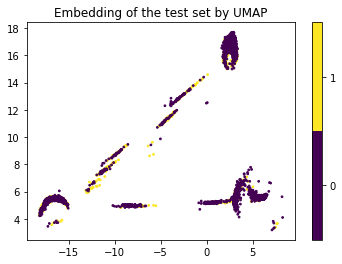

In [26]:
plt.scatter(test_embedding_sup[:, 0], test_embedding_sup[:, 1], s = 3, c = Y_test)
plt.title('Embedding of the test set by UMAP', fontsize = 12)
plt.colorbar(boundaries = np.arange(3) - 0.5).set_ticks(np.arange(2)) # 1 = tumor, 0 = normal

# Run RFs on UMAP-transformed train data

**Idea**: use UMAP to reduce the dimensionality to 100 features and then train RFs on those. **Didn't work well**:

- Unsupervised UMAP: ROC-AUC = 0.49
- Supervised UMAP: ROC-AUC = 0.58

In [27]:
trans = umap.UMAP(n_neighbors = 15, random_state = 42, verbose = True,
                  n_components = 100, metric = 'euclidean', n_jobs = -1).fit(X, y = Y)

UMAP(n_components=100, random_state=42, verbose=True)
Thu Nov 11 20:54:09 2021 Construct fuzzy simplicial set
Thu Nov 11 20:54:10 2021 Finding Nearest Neighbors
Thu Nov 11 20:54:11 2021 Building RP forest with 9 trees
Thu Nov 11 20:54:29 2021 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Thu Nov 11 20:56:21 2021 Finished Nearest Neighbor Search
Thu Nov 11 20:56:22 2021 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Nov 11 20:57:40 2021 Finished embedding


In [28]:
trans.embedding_.shape

(5000, 100)

In [29]:
Y.shape

(5000,)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [32]:
rfcl = RandomForestClassifier(n_estimators = 500, random_state = 42, n_jobs = -1, verbose = 1)
rfcl.fit(trans.embedding_, Y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42, verbose=1)

In [33]:
X_test_trans = trans.transform(X_test) # ~10min

Thu Nov 11 20:59:50 2021 Worst tree score: 0.14700000
Thu Nov 11 20:59:50 2021 Mean tree score: 0.15475556
Thu Nov 11 20:59:50 2021 Best tree score: 0.16520000
Thu Nov 11 20:59:52 2021 Forward diversification reduced edges from 75000 to 10256
Thu Nov 11 20:59:52 2021 Reverse diversification reduced edges from 10256 to 10256
Thu Nov 11 20:59:52 2021 Degree pruning reduced edges from 10258 to 5917
Thu Nov 11 20:59:52 2021 Resorting data and graph based on tree order
Thu Nov 11 20:59:53 2021 Building and compiling search function


Epochs completed:   0%|            0/100 [00:00]

In [34]:
pred = rfcl.predict_proba(X_test_trans)
pred.shape

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.4s finished


(6000, 2)

In [35]:
roc_auc_score(Y_test, pred[:,1])

0.5767528056335652